In [1]:
import csv
from PIL import Image # pip install Pillow
import numpy as np
from matplotlib import pyplot
from os import path
import pandas as pd

In [2]:
NUM_PEOPLE_TO_READ_IN=250 # Maximum is 10000 for dataset

In [3]:
data = {
    "images":np.empty((NUM_PEOPLE_TO_READ_IN*4,50,50,3)),
    "X":np.empty((NUM_PEOPLE_TO_READ_IN*4,50*50*3)),
    "Y":np.empty((NUM_PEOPLE_TO_READ_IN*4))
}

counter = 0
with open('metadata.csv', newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in tuple(rows)[1:]:
        
        mask_type = int(row[1])
        filename = row[5]
        
        try:
            image = np.array(Image.open(path.join("data", filename)))
        except FileNotFoundError:
            image = np.zeros([50,50,3]) # USED FOR DISPLAYING NICELY BELOW / TODO: MAKE SURE TO FILTER THESE AT SOME POINT
            
        data["images"][counter] = image
        data["X"][counter] = np.reshape(image, 50*50*3)
        data["Y"][counter] = mask_type
        
        counter += 1
        if(counter >= NUM_PEOPLE_TO_READ_IN*4):
            break
            
    data["images"] = data["images"].astype(int)
    data["X"] = data["X"].astype(int)
    data["Y"] = data["Y"].astype(int)

In [4]:
print(data["images"].shape)
print(data["X"].shape)
print(data["Y"].shape)

(1000, 50, 50, 3)
(1000, 7500)
(1000,)


In [5]:
pd.DataFrame(data["X"])

0     1     2     3     4     5     6     7     8     9     ...  7490  \
0     153   122   117   159   128   123   163   133   125   168  ...     8   
1     165   135   135   168   138   138   171   143   142   175  ...    24   
2     178   160   156   181   163   159   186   166   165   189  ...    40   
3     193   183   184   197   187   188   201   186   191   204  ...    82   
4     204   191   175   201   188   172   211   195   182   212  ...    35   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
995    68    63    33    78    73    43   142   133   102   124  ...    38   
996   190   208   160   153   171   123   129   147    99   140  ...    35   
997   181   208   155   202   229   174   208   233   178   207  ...    29   
998   227   243   204   228   246   208   187   204   168   156  ...    80   
999   216   225   194   247   255   222   223   236   193   171  ...    62   

     7491  7492  7493  7494  7495  7496  7497  7498  7499  
0     112    53    59   103    41    46    96    34    39  
1     129    59    69   136    62    75   122    48    61  
2     102    58    71   135    79    92   114    54    66  
3      95    44    59    61    20    36    78    42    56  
4      54    45    30    53    46    30    54    47    31  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
995    43    46    37    51    57    47    53    61    48  
996    48    49    51    39    43    44    46    50    51  
997    45    49    50    41    45    46    22    26    27  
998    64    68    71    22    21    27    42    41    47  
999    74    75    77    76    77    82    50    51    56  

[1000 rows x 7500 columns]

In [6]:
pd.DataFrame(data["Y"], columns=np.array(["Y"]))

Y
0    1
1    2
2    3
3    4
4    1
..  ..
995  4
996  1
997  2
998  3
999  4

[1000 rows x 1 columns]

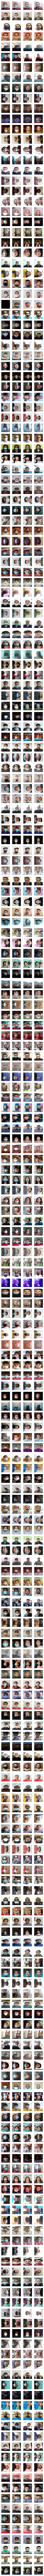

In [7]:
pyplot.figure(figsize=(4, NUM_PEOPLE_TO_READ_IN))
counter = 0
for img in data["images"]:
    pyplot.subplot(NUM_PEOPLE_TO_READ_IN, 4, counter+1)
    pyplot.axis("off")
    pyplot.imshow(img)
    counter += 1